# SVM

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
SVMvectorizer = CountVectorizer()
X = SVMvectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Classifier
SVMmodel = SVC(kernel='linear', C=1, random_state=42, probability=True)  # You can adjust parameters as needed

# Train the model
SVMmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = SVMmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 85.13%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.72      0.76      0.74       379
     bipolar       0.62      0.61      0.61       384
  depression       0.74      0.71      0.72       373
      normal       0.94      0.95      0.95      2183
        ptsd       0.78      0.74      0.76       394

    accuracy                           0.85      3713
   macro avg       0.76      0.75      0.76      3713
weighted avg       0.85      0.85      0.85      3713

Confusion Matrix:
 [[ 287   22   29   13   28]
 [  20  233   29   88   14]
 [  37   31  265   11   29]
 [  20   62    8 2084    9]
 [  34   26   29   13  292]]


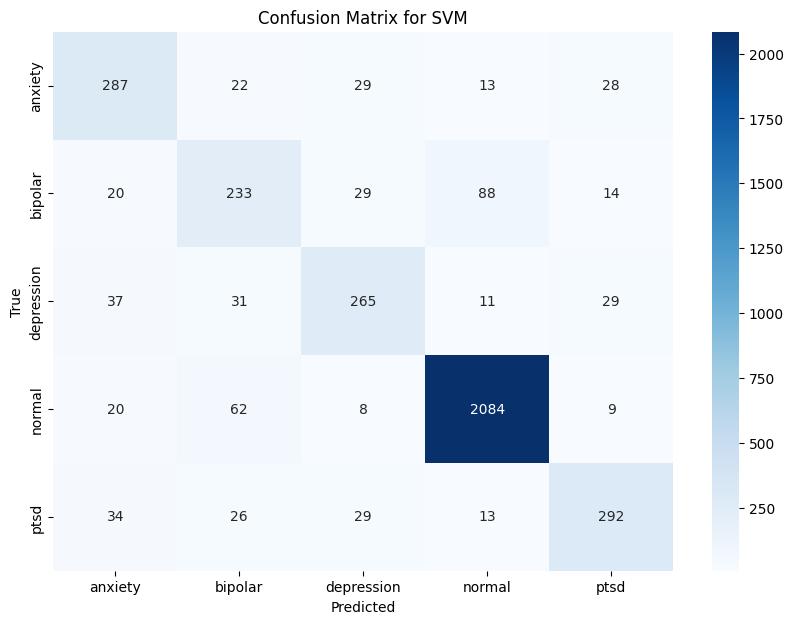

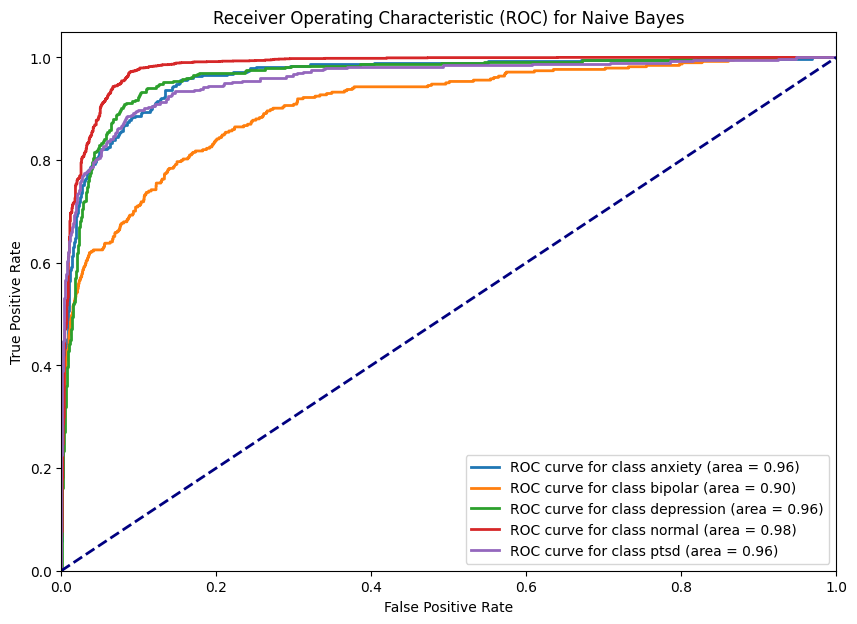

In [9]:
# Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=SVMmodel.classes_, yticklabels=SVMmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()


# ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC
y_test_binarized = label_binarize(y_test, classes=SVMmodel.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], SVMmodel.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(SVMmodel.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


In [10]:
# Saving the SVMmodel and SVMvectorizer

import joblib

# Save the best model and vectorizer
joblib.dump(SVMmodel, 'SVMmodel.pkl')
joblib.dump(SVMvectorizer, 'SVMvectorizer.pkl')

['SVMvectorizer.pkl']

In [11]:
!jupyter nbconvert --to html 05_SVM.ipynb

[NbConvertApp] Converting notebook 05_SVM.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 442043 bytes to 05_SVM.html
